In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from glob import glob
import numpy as np
import PIL
from PIL import Image

path = './seghair(bw)imggen/'

training_images = []
training_labels = []

# Label & image
for filename in glob(path + "*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        an_img = an_img.resize((128, 128))
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('\\')[-1]
        training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder
# Label = 0 ~ 9 
le = LabelEncoder()
training_labels = le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1, 1)

print(training_images.shape)
print(training_labels.shape)

(10, 128, 128, 3)
(10, 1)


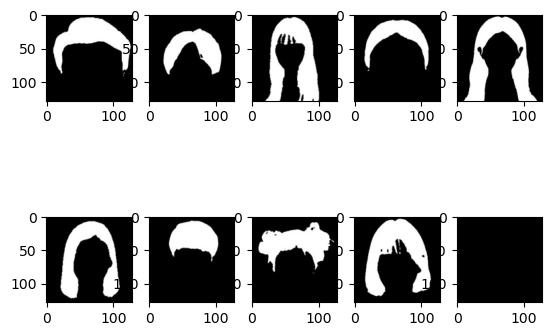

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(training_images[i])
plt.show()

In [4]:
label_num = [0,1,2,3,4,5,6,7,8,9]
label_name = le.inverse_transform(label_num)

for i in range(10):
    print(label_num[i], label_name[i])

0 hair0
1 hair1
2 hair2
3 hair3
4 hair4
5 hair5
6 hair6
7 hair7
8 hair8
9 hair9


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)

# image augmentation
image_generator = ImageDataGenerator(
    rotation_range=30,
    brightness_range = [0.8, 1.0],
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

In [6]:
augment_size = 1000

np.random.seed(42)

random_mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image_aug = training_images[random_mask].copy()
training_labels_aug = training_labels[random_mask].copy()

In [7]:
training_image_aug = image_generator.flow(training_image_aug, np.zeros(augment_size), batch_size=augment_size, shuffle=False, seed=42).next()[0]

training_images = np.concatenate((training_images, training_image_aug))
training_labels = np.concatenate((training_labels, training_labels_aug))

## training data = 1010개

tf.Tensor([[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)
tf.Tensor([[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(1, 10), dtype=float32)


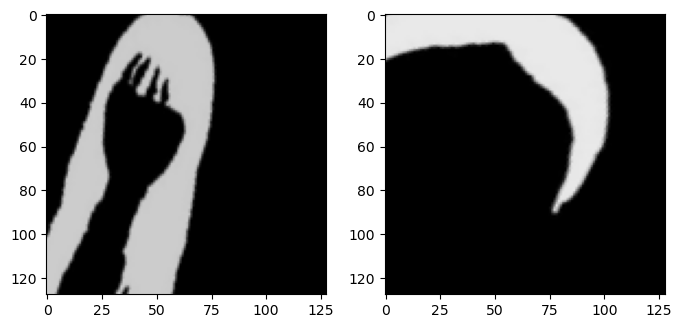

In [9]:
import tensorflow as tf

sample_image = training_images[60]
sample_label = tf.one_hot(training_labels[60], 10)

sample_image2 = training_images[158]
sample_label2 = tf.one_hot(training_labels[158], 10)

fig = plt.figure(figsize = (8,8))

plt.subplot(2, 2, 1)
plt.imshow(sample_image.astype('uint8'))
print(sample_label)

plt.subplot(2, 2, 2)
plt.imshow(sample_image2.astype('uint8'))
print(sample_label2)

plt.show()

In [10]:
training_labels = tf.one_hot(training_labels, 10)

# label -> OneHotEncoding

In [11]:
from sklearn.model_selection import train_test_split

training_labels = np.array(training_labels)
training_labels = training_labels.reshape(-1, 10)

X_train, X_valid, y_train, y_valid = train_test_split(training_images,
                                                     training_labels,
                                                     test_size=0.05,
                                                     stratify = training_labels,
                                                     random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(959, 128, 128, 3)
(959, 10)
(51, 128, 128, 3)
(51, 10)


In [25]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [26]:
# Nodeling

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
# model.add(tf.keras.Input(shape=(128,128,3)))
model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(train_x, train_labels, epochs=500, verbose=0)

In [208]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# model = tf.keras.models.Sequential()

# model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(128, 128, 3)))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10, activation="softmax"))

# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
data = model.fit(X_train,
                y_train,
                validation_data=(X_valid, y_valid),
                epochs = 30,
                batch_size=128,)

Epoch 1/30
8/8 [==============================] - 6s 634ms/step - loss: 2.4289 - accuracy: 0.2430 - val_loss: 2.0279 - val_accuracy: 0.2941
Epoch 2/30
8/8 [==============================] - 5s 620ms/step - loss: 1.7633 - accuracy: 0.4891 - val_loss: 1.6353 - val_accuracy: 0.5098
Epoch 3/30
8/8 [==============================] - 5s 616ms/step - loss: 1.1288 - accuracy: 0.6569 - val_loss: 1.2401 - val_accuracy: 0.5882
Epoch 4/30
8/8 [==============================] - 5s 617ms/step - loss: 0.5420 - accuracy: 0.8332 - val_loss: 1.0599 - val_accuracy: 0.6078
Epoch 5/30
8/8 [==============================] - 5s 618ms/step - loss: 0.2398 - accuracy: 0.9406 - val_loss: 1.1760 - val_accuracy: 0.6471
Epoch 6/30
8/8 [==============================] - 5s 616ms/step - loss: 0.0835 - accuracy: 0.9844 - val_loss: 1.1990 - val_accuracy: 0.6863
Epoch 7/30
8/8 [==============================] - 5s 622ms/step - loss: 0.0286 - accuracy: 0.9979 - val_loss: 1.4133 - val_accuracy: 0.6471
Epoch 8/30
8/8 [====

(1, 128, 128, 3)


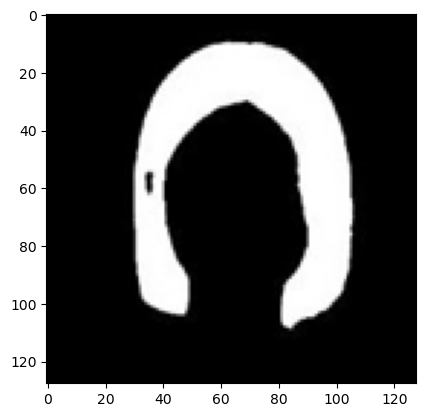

In [34]:
## Test

test_image = []
test = 'bwtest1.jpg'
test_img = PIL.Image.open(test)
test_img = test_img.resize((128, 128))
test_array = np.array(test_img)
test_image.append(test_array)

test_image = np.array(test_image)

test_image = test_image / 255.0

print(test_image.shape)
plt.imshow(test_img)

In [35]:
pred = model.predict(test_image)

pred = np.argmax(pred)
pred

1/1 [==============================] - 0s 18ms/step


5